# Classification with scikit-learn SVM

## Classic SVM Code

## Import Packages

In [1]:
import numpy as np
import glob
from utils_updated import *
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn import preprocessing
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


## Load the training and test sets

X_train (50, 8)
Y_train (50,)
X_test (250000, 8)
Y_test (250000,)


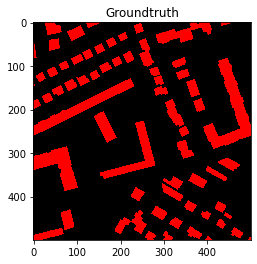

In [2]:
# Load training set
key='_tiny'
X_train=np.load('X_train_tile_4'+key+'.npy')
Y_train=np.load('Y_train_tile_4'+key+'.npy')

print('X_train',X_train.shape) 
print('Y_train',Y_train.shape) 

# Load test set
X_test=np.load('X_test_tile_8_subregion.npy')
Y_test=np.load('Y_test_tile_8_subregion.npy')

print('X_test',X_test.shape) 
print('Y_test',Y_test.shape) 

# If {-1,1} is required:
Y_train=np.where(Y_train==0,-1,Y_train)

groundtruth=np.reshape(Y_test,(500,500))
plt.title('Groundtruth')
cmap = colors.ListedColormap(['black', 'red'])
plt.rcParams["figure.figsize"] = (5,5)
view=plt.imshow(groundtruth,cmap=cmap)

## Classic SVM

### Training parameters

A calibration on the kernel hyperparameters is performed, i.e., $C$ for the linear kernel and $C, \gamma$ for the Gaussian kernel.

In [3]:
outputpath='output/run_calibtrain'+key

# Parameters 
C_linear = range(4,20)
C_kernel = [2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10]
gammas = [2**-10, 2**-9, 2**8, 2**-7, 2**-6, 2**-5, 2**-4]

f1_scores_linear = np.zeros(len(C_linear))
accuracy_scores_linear = np.zeros(len(C_linear))
f1_scores_rbf = np.zeros((len(C_kernel), len(gammas)))
accuracy_scores_rbf = np.zeros((len(C_kernel), len(gammas)))

### Training, testing, results

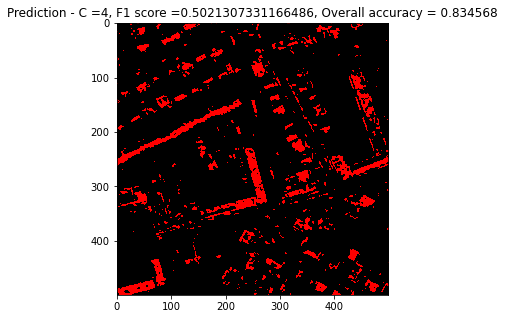

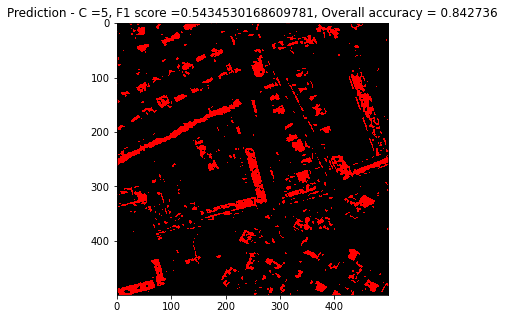

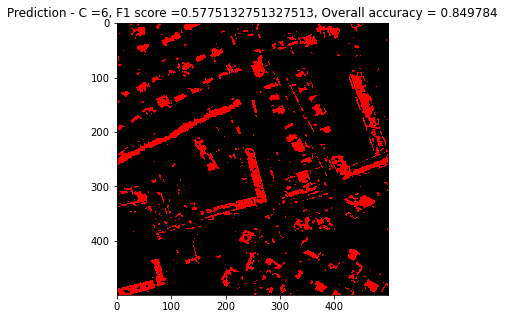

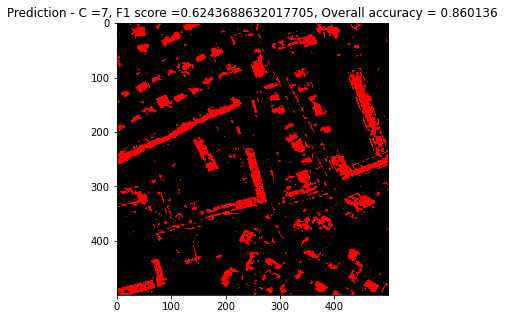

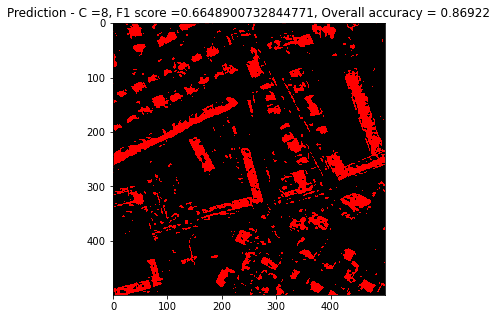

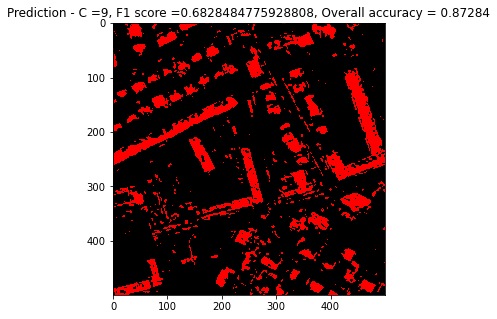

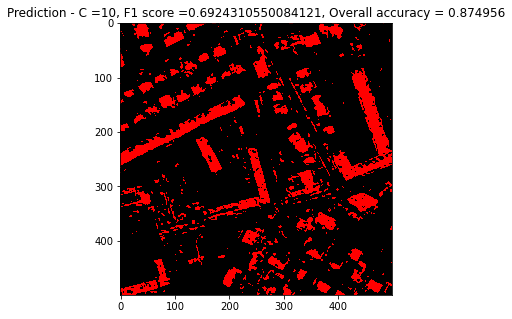

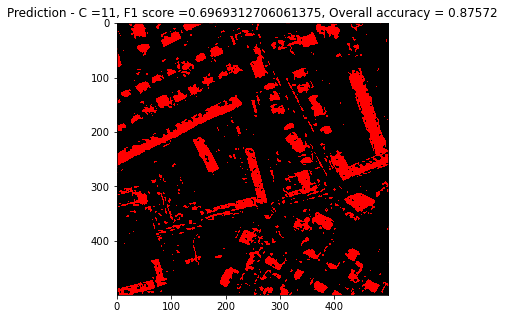

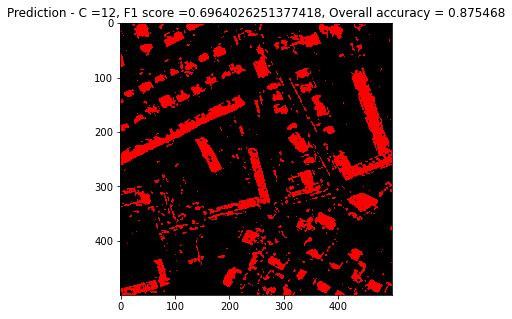

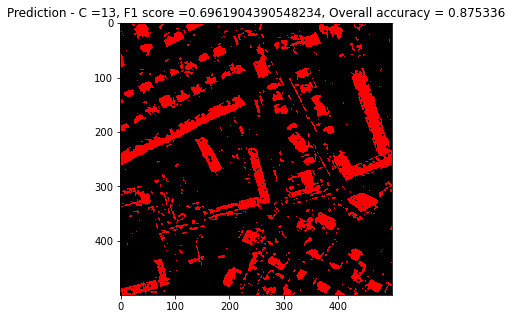

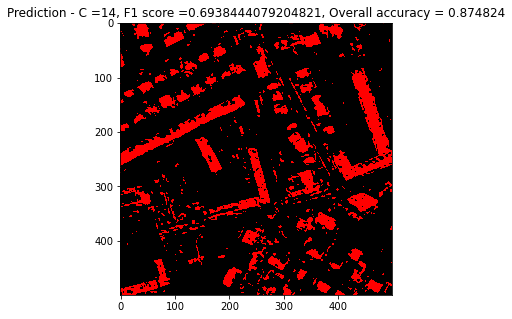

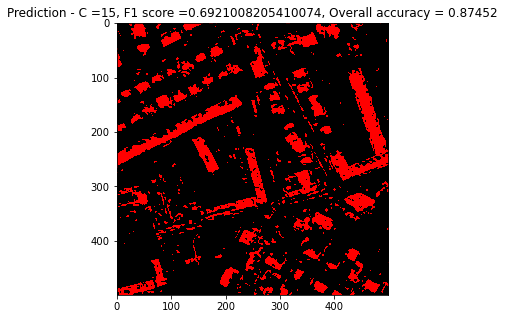

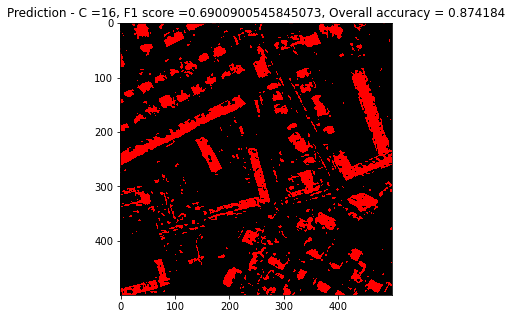

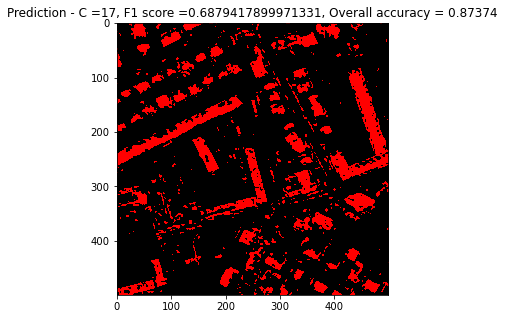

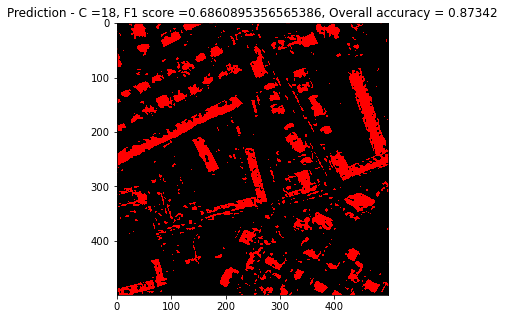

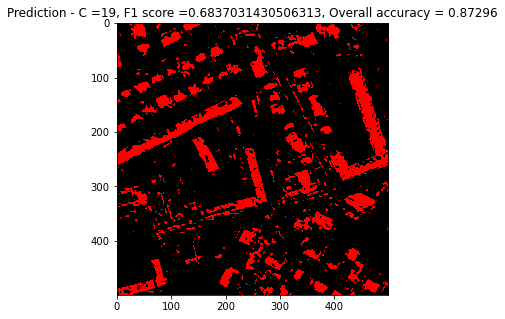

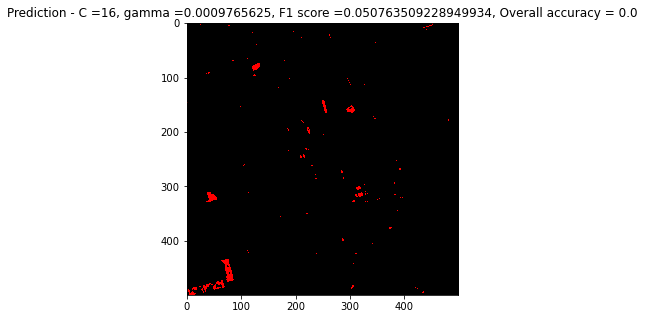

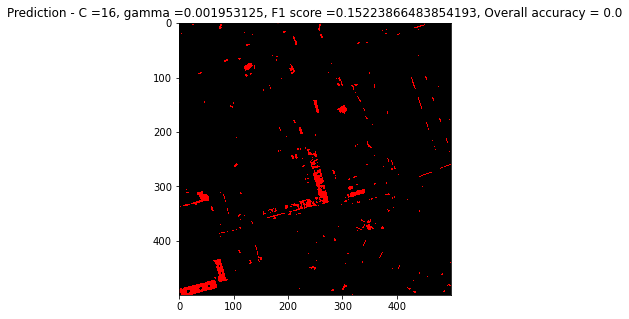

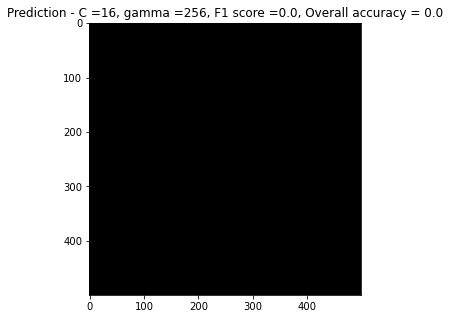

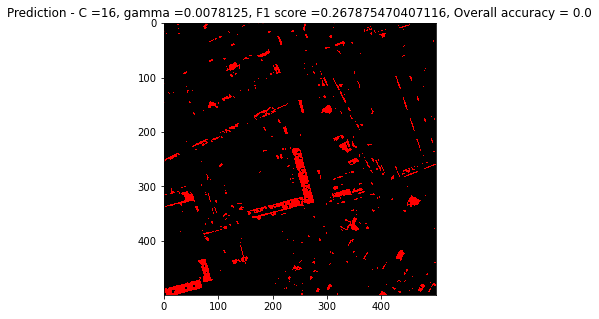

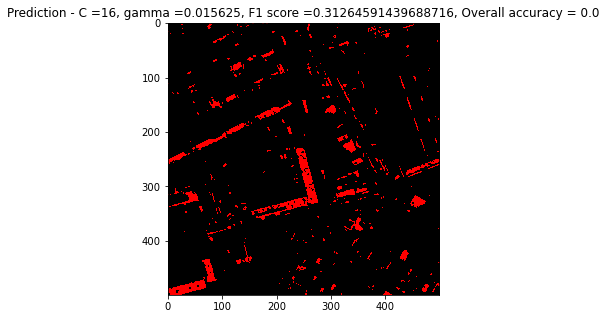

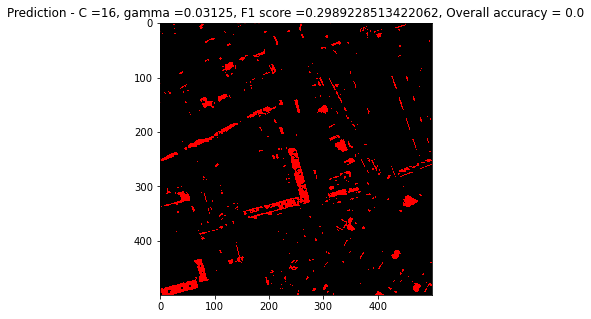

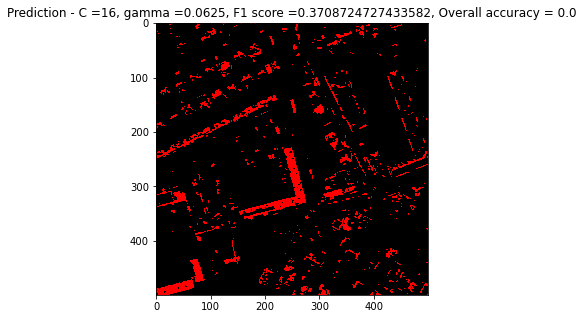

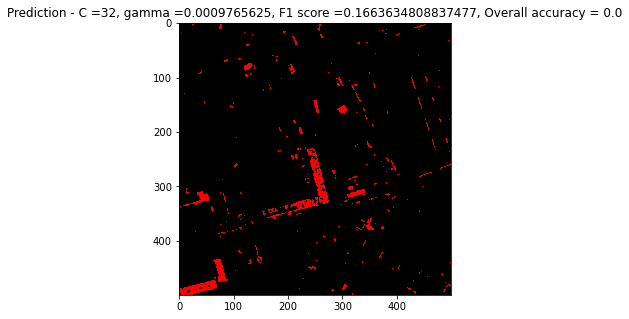

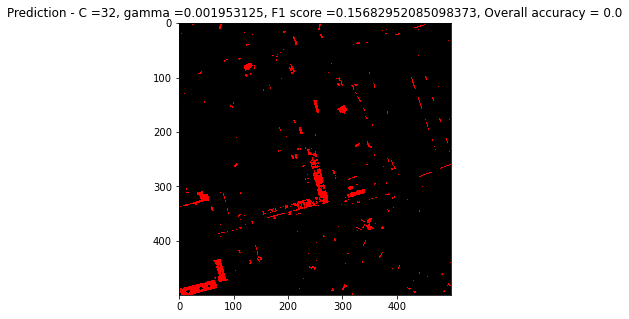

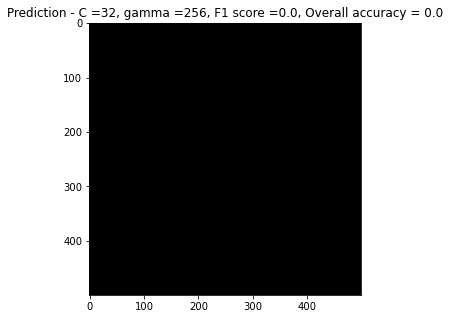

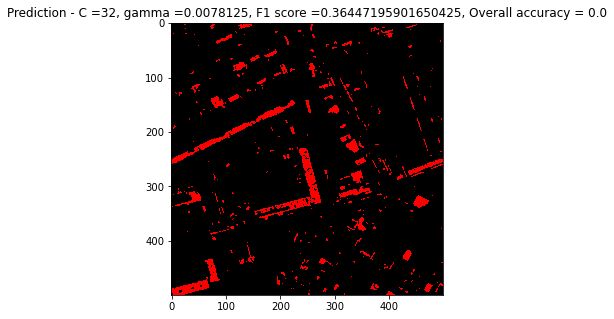

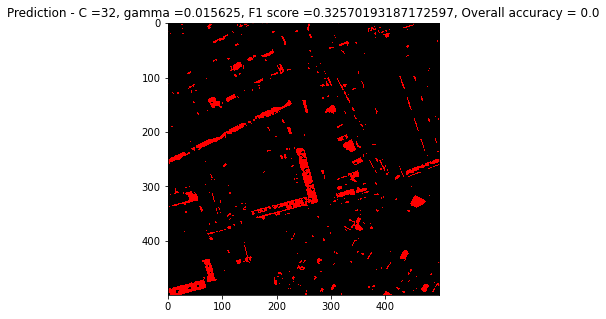

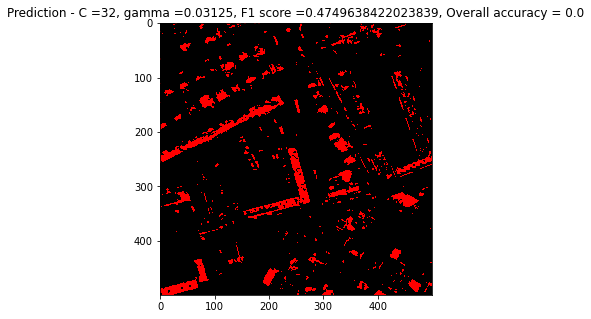

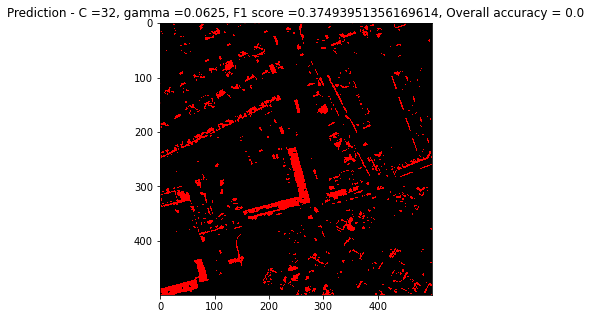

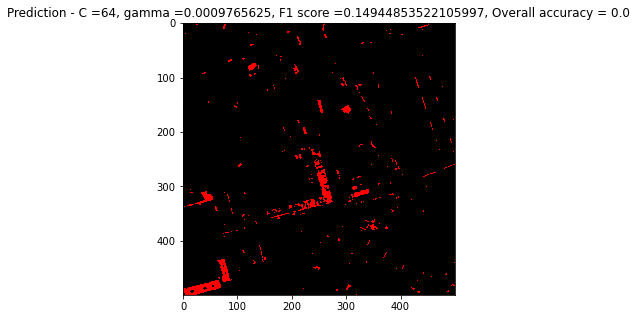

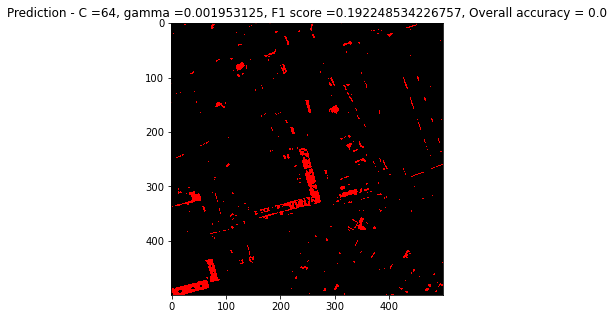

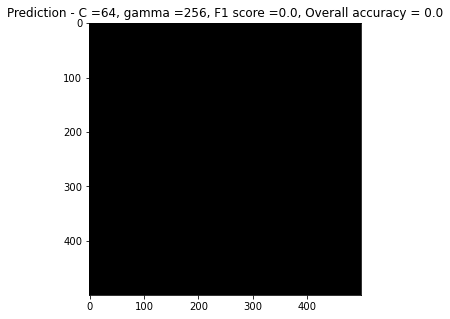

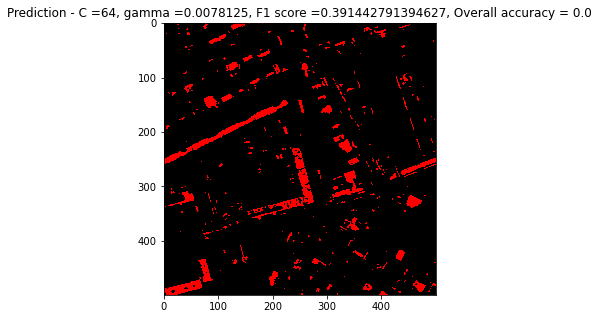

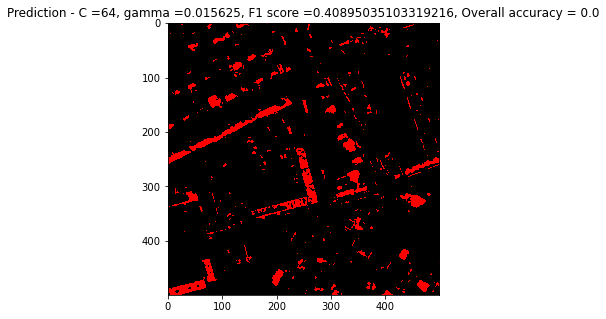

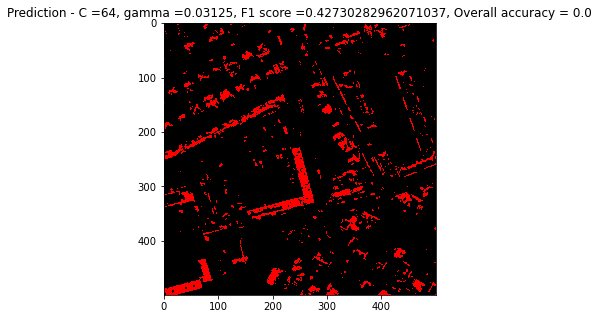

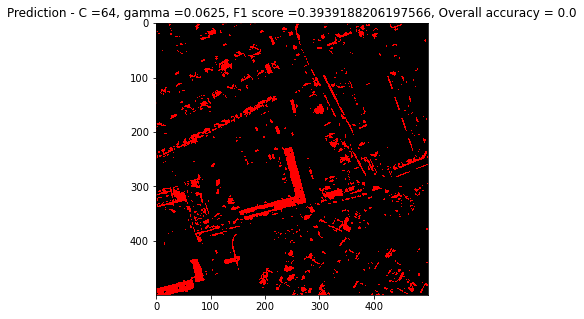

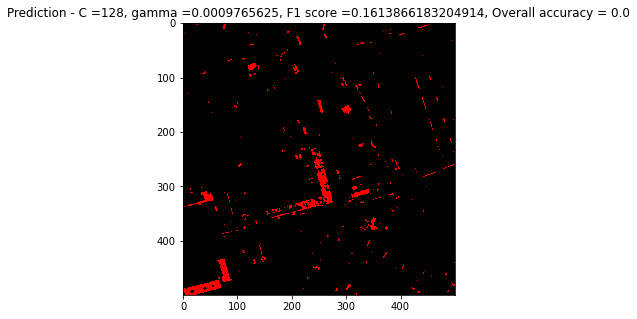

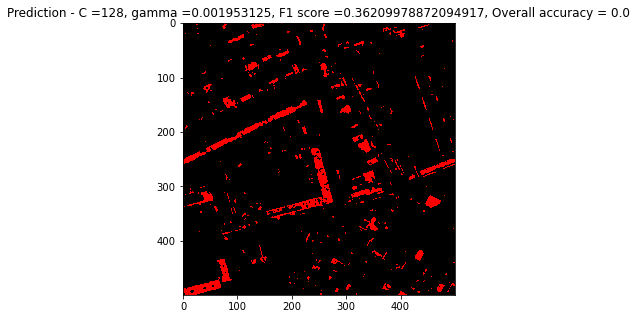

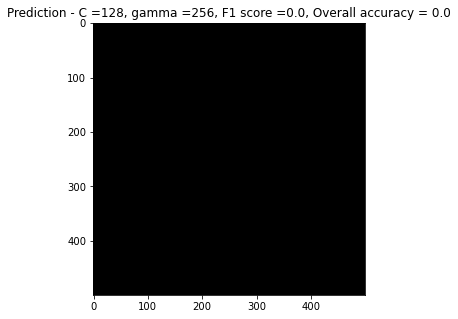

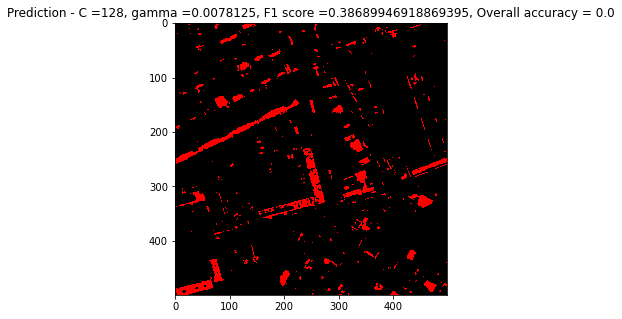

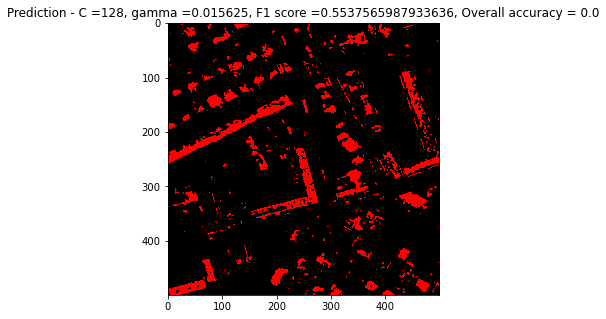

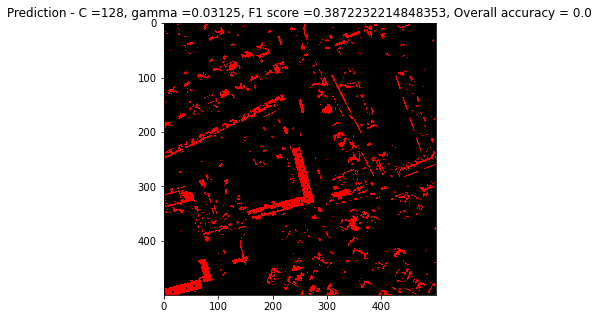

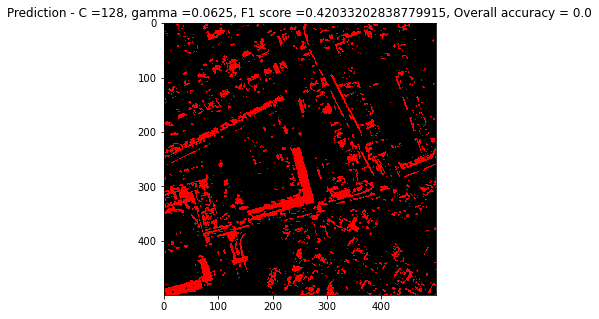

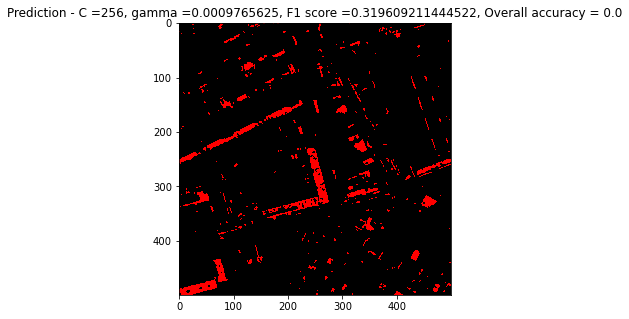

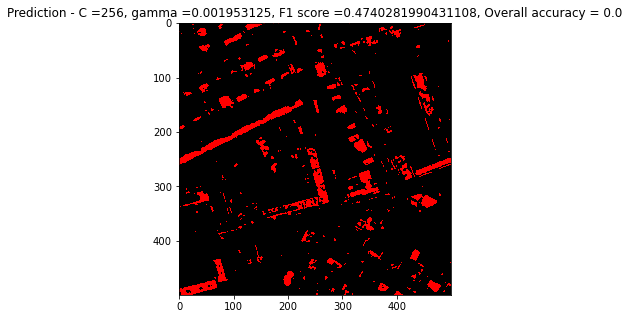

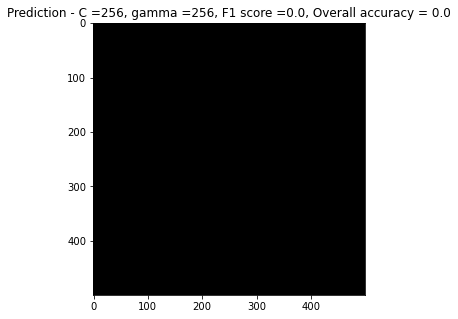

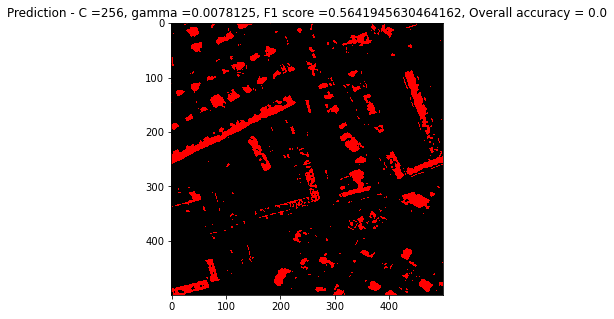

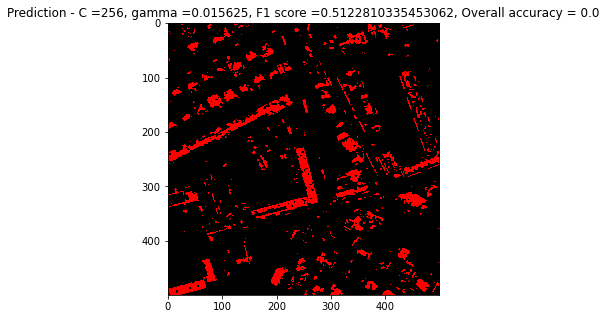

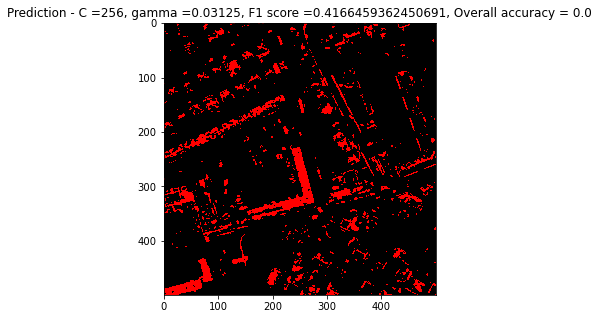

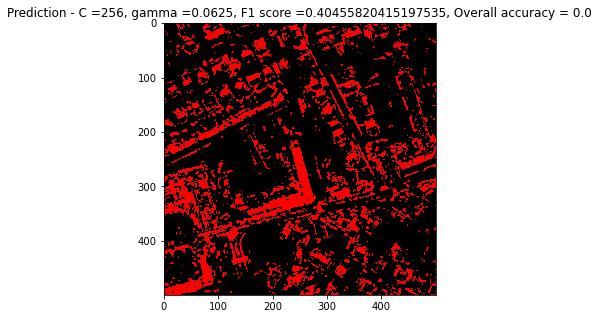

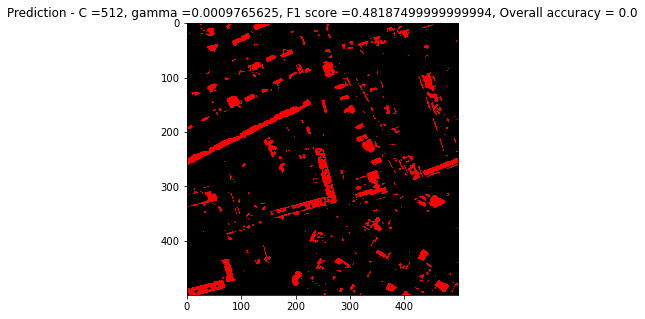

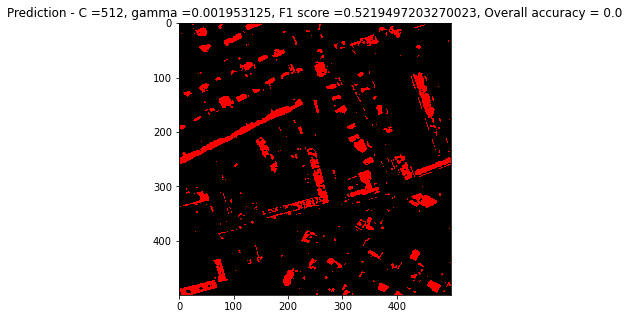

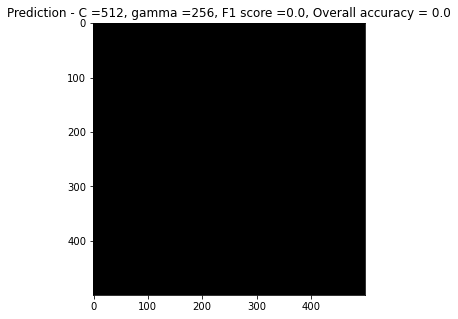

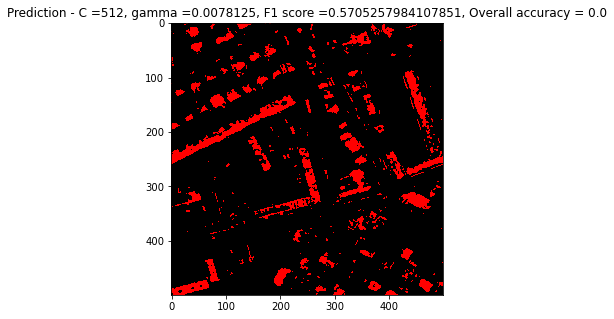

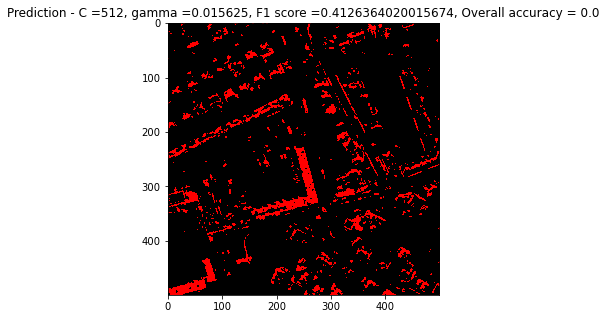

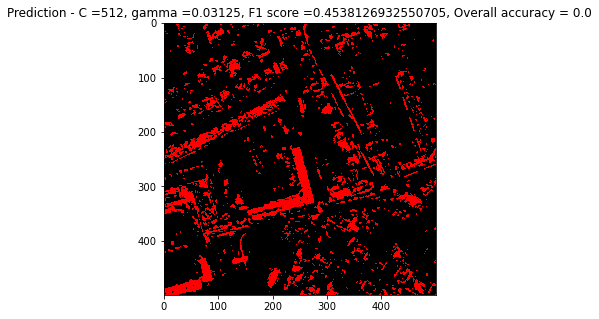

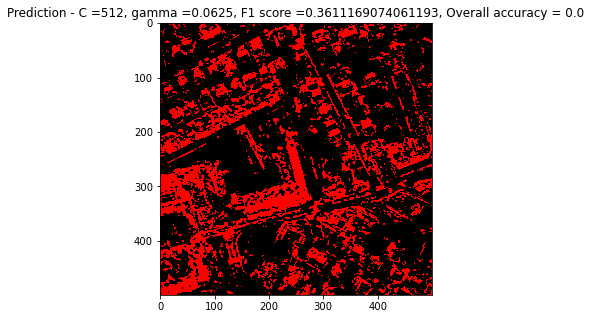

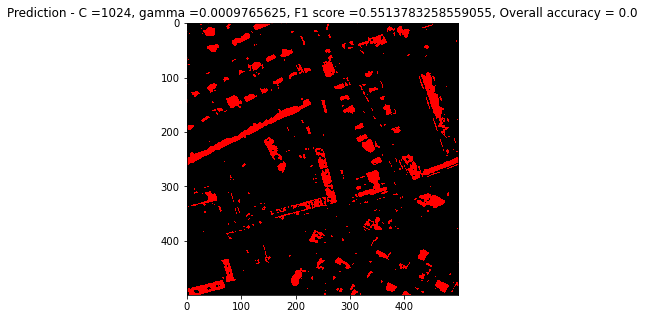

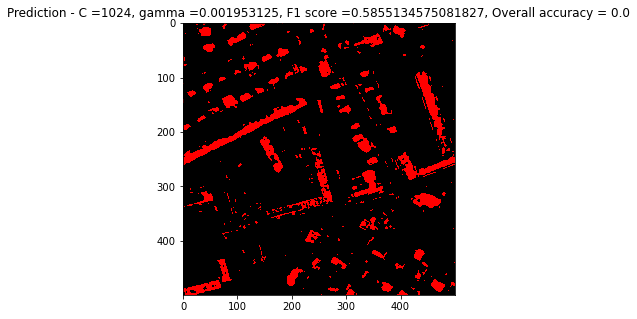

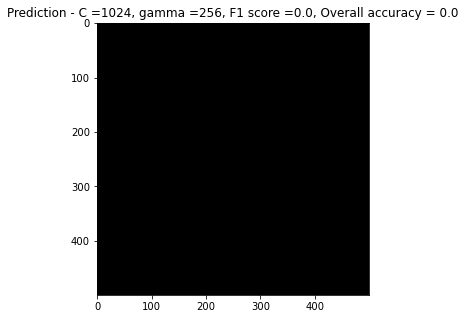

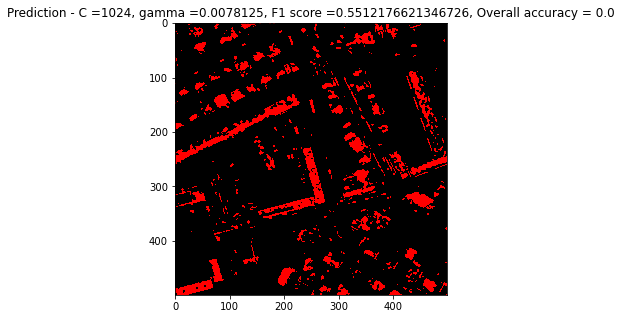

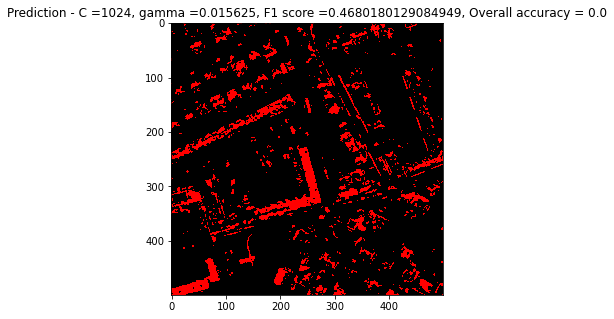

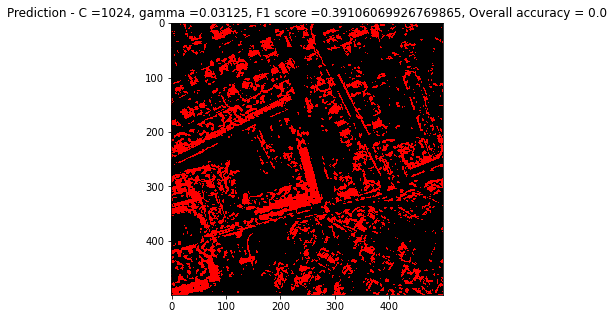

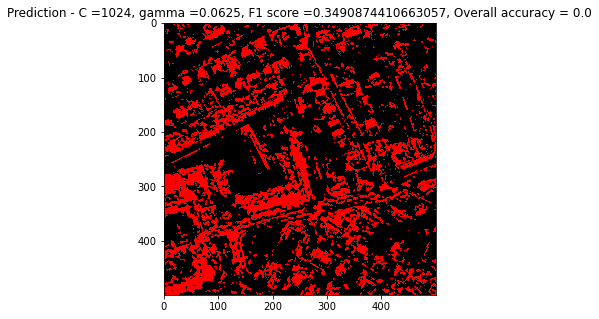

[0.5021 0.5435 0.5775 0.6244 0.6649 0.6828 0.6924 0.6969 0.6964 0.6962
 0.6938 0.6921 0.6901 0.6879 0.6861 0.6837]
[[0.0508 0.1522 0.     0.2679 0.3126 0.2989 0.3709]
 [0.1664 0.1568 0.     0.3645 0.3257 0.475  0.3749]
 [0.1494 0.1922 0.     0.3914 0.409  0.4273 0.3939]
 [0.1614 0.3621 0.     0.3869 0.5538 0.3872 0.4203]
 [0.3196 0.474  0.     0.5642 0.5123 0.4166 0.4046]
 [0.4819 0.5219 0.     0.5705 0.4126 0.4538 0.3611]
 [0.5514 0.5855 0.     0.5512 0.468  0.3911 0.3491]]


In [4]:
cmap = colors.ListedColormap(['black', 'red'])
plt.rcParams["figure.figsize"] = (5,5)
Y_train_bin=np.where(Y_train==-1,0,Y_train)

i = j = 0

for C in C_linear:
    model = SVC(kernel='linear', C=C)
    model.fit(X_train, Y_train)
    Y_pred = np.sign(model.decision_function(X_test))
    Y_pred=np.where(Y_pred==-1,0,Y_pred)
    f1_scores_linear[i] = f1_score(Y_test, Y_pred)
    accuracy_scores_linear[i] = accuracy_score(Y_test, Y_pred)
    
    classification_map=np.reshape(Y_pred,(500,500))
    plt.title('Prediction - C =' + str(C) + ', F1 score =' + str(f1_scores_linear[i]) + ', Overall accuracy = ' + str(accuracy_scores_linear[i]))
    plt.imshow(classification_map, cmap=cmap)
    plt.clim(0, 1)
    plt.show()
    i += 1

i = 0

for C in C_kernel:
    j = 0
    for gamma in gammas:
        model = SVC(kernel='rbf', gamma=gamma, C=C)
        model.fit(X_train, Y_train)
        Y_pred = np.sign(model.decision_function(X_test))
        Y_pred=np.where(Y_pred==-1,0,Y_pred)
        f1_scores_rbf[i,j] = f1_score(Y_test, Y_pred)
        
        classification_map=np.reshape(Y_pred,(500,500))
        plt.title('Prediction - C =' + str(C) + ', gamma =' + str(gamma) + ', F1 score =' + str(f1_scores_rbf[i,j]) + ', Overall accuracy = ' + str(accuracy_scores_rbf[i,j]))
        plt.imshow(classification_map, cmap=cmap)
        plt.clim(0, 1)
        plt.show()
    
        j +=1
    i += 1

print(f1_scores_linear)
print(f1_scores_rbf)